*Hubert Kaczyński; nr albumu 331386; grupa 101*
# **WSI laboratorium 4. Regresja i klasyfikacja**

Poniżej znajdują się analizy przygotowanego przeze mnie modelu regresji liniowej z regularyzacją L1 i L2 oraz prezentacja jego działania na przykładzie przewidywania wag ryb, mając ich gatunki i wymiary.

### **Dane**
Dane wejściowe zostały sprecyzowane w poleceniu i są zawarte w pliku *fish_species.csv*. Znajduje się w nim 10 kolumn, które określają gatunek ryby i pomiary dotyczące danego osbnika - waga oraz długości różnych części ryby. Waga będzie zmienną zależną, która stanie się przedmiotem przewidywań mojego algorytmu.

Poniżej znajduje się prezentacja pliku z danymi:

In [139]:
import pandas as pd
species_data = pd.read_csv('fish_species.csv')

# szczegóły kolumn
species_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
 7   Length4  159 non-null    float64
 8   Length5  159 non-null    float64
 9   Length6  159 non-null    float64
dtypes: float64(9), object(1)
memory usage: 12.5+ KB


In [140]:
# przykładowe wiersze
species_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Length4,Length5,Length6
0,Bream,281.570874,24.274191,35.680908,43.511944,11.099882,3.813141,22.474191,29.080908,39.511944
1,Bream,329.570874,27.074191,15.680908,32.011944,12.059882,4.098741,23.274191,29.980908,40.711944
2,Bream,379.570874,16.074191,38.680908,48.911944,11.957682,4.489241,23.174191,30.180908,40.611944
3,Bream,402.570874,23.374191,29.680908,36.011944,12.309882,4.248641,25.574191,32.680908,43.011944
4,Bream,469.570874,21.874191,43.680908,22.611944,12.023882,4.927141,25.774191,32.680908,43.511944


In [141]:
# podsumowanie zawartości kolumn
species_data.describe()

,Weight,Length1,Length2,Length3,Height,Width,Length4,Length5,Length6
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,437.897289,25.521360,32.096631,40.738988,8.550876,4.210626,25.521360,32.096631,40.738988
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804,9.996441,10.716328,11.610246
min,39.570874,6.774191,12.080908,18.311944,1.308282,0.840741,6.774191,12.080908,18.311944
25%,159.570874,18.324191,24.680908,32.661944,5.524682,3.178791,18.324191,24.680908,32.661944
50%,312.570874,24.474191,30.980908,38.911944,7.365882,4.041641,24.474191,30.980908,38.911944
75%,689.570874,31.974191,39.180908,49.161944,11.945782,5.377641,31.974191,39.180908,49.161944
max,1689.570874,58.274191,67.080908,77.511944,18.536882,7.935141,58.274191,67.080908,77.511944


W danych znajduje się kolumna, która posiada wartości nieliczbowe - species. W celu usprawnienia tworzenia modelu regresji zamienię je na wartości liczbowe. Błędem byłaby bezpośrednia konwersja gatunków na kolejne cyfry, bo algorytm mółby uznać ryby bliskie sobie w tabeli za bardziej powiązane. Zamienię zatem kolumnę species na wiele kolumn, każda odpowiadająca innemu gatunkowi. Dany rekord będzie posiadał wartość 1 w kolumnie odpowiadającej jego gatunkowi.

Sprawdzam ile i jakie gatunki są w pliku:

In [142]:
print(species_data['Species'].unique())

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


Gatunków jest 7. Aby ostatecznie wprowadzić wspomniane zmiany i polepszyć tworzenie modelu regresji, korzystam z sposobu *dummy_coding* przy użyciu funkcji get_dummies. Aby uniknąć zwiększonego wpływu pierwszego gatunku na dane, usuwa ona pierwszą kolumnę gatunków:

In [143]:
species_data_numerical = pd.get_dummies(species_data, columns=['Species'], drop_first=True).astype('float64')
species_data_numerical.head()

,Weight,Length1,Length2,Length3,Height,Width,Length4,Length5,Length6,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,281.570874,24.274191,35.680908,43.511944,11.099882,3.813141,22.474191,29.080908,39.511944,0.0,0.0,0.0,0.0,0.0,0.0
1,329.570874,27.074191,15.680908,32.011944,12.059882,4.098741,23.274191,29.980908,40.711944,0.0,0.0,0.0,0.0,0.0,0.0
2,379.570874,16.074191,38.680908,48.911944,11.957682,4.489241,23.174191,30.180908,40.611944,0.0,0.0,0.0,0.0,0.0,0.0
3,402.570874,23.374191,29.680908,36.011944,12.309882,4.248641,25.574191,32.680908,43.011944,0.0,0.0,0.0,0.0,0.0,0.0
4,469.570874,21.874191,43.680908,22.611944,12.023882,4.927141,25.774191,32.680908,43.511944,0.0,0.0,0.0,0.0,0.0,0.0


W takiej formie dane są gotowe do podziału. Oddzielam przewidywaną zmienną zależną *weight*. Następnie przygotowuję trzy podzbiory z przygotowanych danych - trenujący, walidacyjny i testowy. Przyjąłem, że trenujący zwierał będzie 60% danych, a pozostałe dwa po 20%.

Następnie przeprowadzam normalizację danych. Polega to a centralizacji danych wokół wartości średniej, która staje się zerem. Wszystkie wartości są również dzielone przez odchylenie standardowe.

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# podział
X = species_data_numerical.drop(columns=['Weight'])
Y = species_data_numerical['Weight']

X_training, X_rest, Y_training, Y_rest = train_test_split(X, Y, test_size=0.4, random_state=999)
X_validation, X_testing, Y_validation, Y_testing = train_test_split(X_rest, Y_rest, test_size=0.5, random_state=999)

# normalizacja
scaler = StandardScaler()
X_training_scaled = scaler.fit_transform(X_training)
X_validation_scaled = scaler.transform(X_validation)
X_testing_scaled = scaler.transform(X_testing)

print(X_training_scaled[:2])
print(len(X_training_scaled))
print(X_validation_scaled[:2])
print(len(X_validation_scaled))
print(X_testing_scaled[:2])
print(len(X_testing_scaled))

[[ 0.3787955   3.01528975 -1.16014879  1.22946151  0.69197456  0.44763638
   0.44678649  0.62525743 -0.28203804 -0.74657689 -0.32349832 -0.36187343
  -0.28203804 -0.23570226]
 [-0.28233006  0.65230747 -1.27007542 -1.22674998 -1.39942933 -1.46897406
  -1.46860661 -1.42299966 -0.28203804 -0.74657689 -0.32349832  2.76339712
  -0.28203804 -0.23570226]]
95
[[ 0.9483806  -1.85836119 -0.94875141  1.64967618  0.60818782  0.54293745
   0.59488389  0.78911799 -0.28203804 -0.74657689 -0.32349832 -0.36187343
  -0.28203804 -0.23570226]
 [ 0.61273224  0.75076507  0.57330968 -1.68659095 -2.06567289 -1.63839819
  -1.6956893  -1.70520397 -0.28203804 -0.74657689 -0.32349832 -0.36187343
   3.54562104 -0.23570226]]
32
[[-1.11636538 -1.73036632 -0.87264836  1.38518378  0.59639965  0.4794034
   0.49615229  0.69808435 -0.28203804 -0.74657689 -0.32349832 -0.36187343
  -0.28203804 -0.23570226]
 [ 0.27708388 -0.67687005 -0.48367719  1.05949184 -0.12993339  0.24644523
   0.24932328  0.41588004 -0.28203804 -0.746

### **Model regresji**

Regresja liniowa polega na dopasowaniu parametrów składających się na linię regresji tak, aby jak najlepiej reprezentować szacowaną wartość zmiennej zależnej, dla danych wartości zmiennych niezależnych. Finalnie funkcja zostaje określana przez współczynniki przy kolejnych zmiennych - wagi, oraz wyraz wolny funkcji - bias.

MSE (Mean Square Error) - błąd średnio kwadratowy będzie funkcją celu, czyli określeniem odległości obecnego rozwiązania od rozwiązania idealnie reprezentującego zależność zmiennej zależnej od zmiennych niezależnych. Będzie on wyznaczany poprzez średnią arytmetyczną kwadratów różnic wartości rzeczywistych od wartości wyznaczonych dla każdego wiersza:
$$ MSE = {\sum _{i=1}^{n}\left(Y_{i(real)}-{{Y_{i(predicted)}}}\right)^{2}\over rownum} $$
Aby uczyć model w tej implementacji użyję algorytm gradientu prostego. Przez to w każdym kroku liczony będzie gradient błędu MSE:
$$ MSE_{grad} = {(Y_{i(real)}-{{Y_{i(predicted)}}})*2\over rownum} $$
Dla danych w formie macierzy NxM doprowadzi to do wyznaczenia różnicy między wartościami rzeczywistymi, a wartościami przewidywanymi w formie macierzy Nx1. Zostaje ona następnie pomnożona przez transponowaną macierz danych wejściowych - zyskuje wymiar MxN, co pozwala na operację mnożenia macierzy zwracającą macierz Mx1. Finalnie operacja przebiegaz zgodnie z:
$$ weights_{grad} = {X^T * 2 * (Y_{i(real)}-{{Y_{i(predicted)}}})\over rownum} $$
Otrzymujemy tym samym macierz gradientu wag - weights_gradient. Znajdują się w niej wszystkie cechy pomnożone przez odpowiadające im błędy w danym kroku.

bias_gradient będzie wyliczany jako średnia arytmetyczna błędu. Na wykresie linii regresji można to interpretować jako przesuwanie prostej w dół lub w górę.

**Regularyzacja**
Regularyzacja jest techniką modyfikacji gradientu, tak aby doprowadzić do zwiększenia uogólnienia modelu. Jej celem jest też ochrona przed overfittingiem - przeuczeniem się modelu. W tej implementacji zajmę się regularyzacją L1 oraz L2.

**Regularyzacja L1** powoduje dodanie do funkcji kosztu wartość bezwzględną współczynników funkcji regresji. Jest ona róznież pomnożona przez argument lambda_val, co spycha małe wagi do zera:
$$ MSE += \lambda * \sum_{i=1}^{n} |weight_i| $$
Jako, że korzystam z algorytmu gradientu prostego, to do macierzy gradientu wag dodana zostanie pochodna:
$$ weights_{grad} += {\lambda * +/-(weight_i)} $$

**Regularyzacja L2** doprowadza do zmniejszenia wszystkich wag proporcjonalnie, dodając do funkcji kosztu kwadrat kolejnych współczynników modelu, pomnożony przez lambda_val:
$$ MSE += \lambda * \sum_{i=1}^{n} (weight_i)^2 $$
Podobnie jak w wypadku L1, algorytm doda do macierzy gradientu wag pochodną dodatkowo podzieloną przez liczbę wierszy:
$$ weights_{grad} += {2 * \lambda * weight_i \over rownum} $$
Różnicą między regularyzacjami jest to, że L2 nie sprowadza mało znaczących wag do zera, tylko je zmniejsza. L2 jest tym samym bardziej wskazane, gdy każda cecha znajdująca się w otrzymanych danych jest potencjalnie istotna.

Tak otrzymane wartości gradientu wag oraz gradientu wyrazu wolnego odejmowane są od obenych wartości wag i wyrazu wolnego, co minimalizuje funkcję celu. Poniżej znajduje się implementacja klasy LinearRegression, która może realizować oba typy regularyzacji:

In [145]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, regularization_type=None, lambda_val=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.regularization_type = regularization_type
        self.lambda_val = lambda_val
        self.iterations = iterations
        self.weights = None
        self.bias = None
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    # gradient prosty
    def gradient_descent(self, X, Y):
        self.bias = 0
        rows, cols = X.shape
        self.weights = np.zeros(cols)
        
        for _ in range(self.iterations):
            Y_predicted = X @ self.weights + self.bias
            error = Y_predicted - Y

            weights_gradient = 2 * X.T @ error / rows
            bias_gradient = np.mean(error)
            
            if self.regularization_type == 'l1':
                weights_gradient += self.lambda_val * np.sign(self.weights)
            elif self.regularization_type == 'l2':
                weights_gradient += 2 * self.lambda_val * self.weights / rows

            self.weights -= self.learning_rate * weights_gradient
            self.bias -= self.learning_rate * bias_gradient

    def fit(self, X, Y):
        self.gradient_descent(X, Y)
        return self
    
    def MSE(self, Y_real, Y_predicted):
        return np.mean((Y_real - Y_predicted) ** 2)
    
    def r_squared(self, Y_real, Y_predicted):
        return 1 - np.sum((Y_real - Y_predicted) ** 2) / np.sum((Y_real - np.mean(Y_real)) ** 2)

# przykład użycia
my_model = LinearRegression(learning_rate=0.1, regularization_type='l1', lambda_val=0.01, iterations=1000)
my_model.fit(X_training_scaled, Y_training)
predicted_value = my_model.predict(X_validation_scaled)
print(f"R^2: {my_model.r_squared(Y_validation, predicted_value)}")
print(f"MSE: {my_model.MSE(Y_validation, predicted_value)}")

R^2: 0.9422233883699712
MSE: 9267.83557293918


MSE na poziomie ok. 9267 oznacza, że model myli się w przewidywaniu wagi o około 96 gramów (pierwiastek z 9267). Współczynnik determinacji R² - mówiący, jaka część zmienności zmiennej zależnej pokrywa się ze zmiennymi w modelu - w idealnej sytuacji ma wartość 1. Natomiast otrzymany 0.942 jest wystarczająco wysoki dla tej mojej implementacji.

### **Badanie zachowania R^2 i MSE dla różnych parametrów**

Poniższa funkcja analyse służy do oceny jakości modeli na podstawie oceny MSE i współczynnika determinacji R^2 na zbiorze walidacyjnym. Badane parametry to learning_rate i lambda_val. Przeanalizuję wyniki dla modelu bez regularyzacji i dla L1 oraz L2.

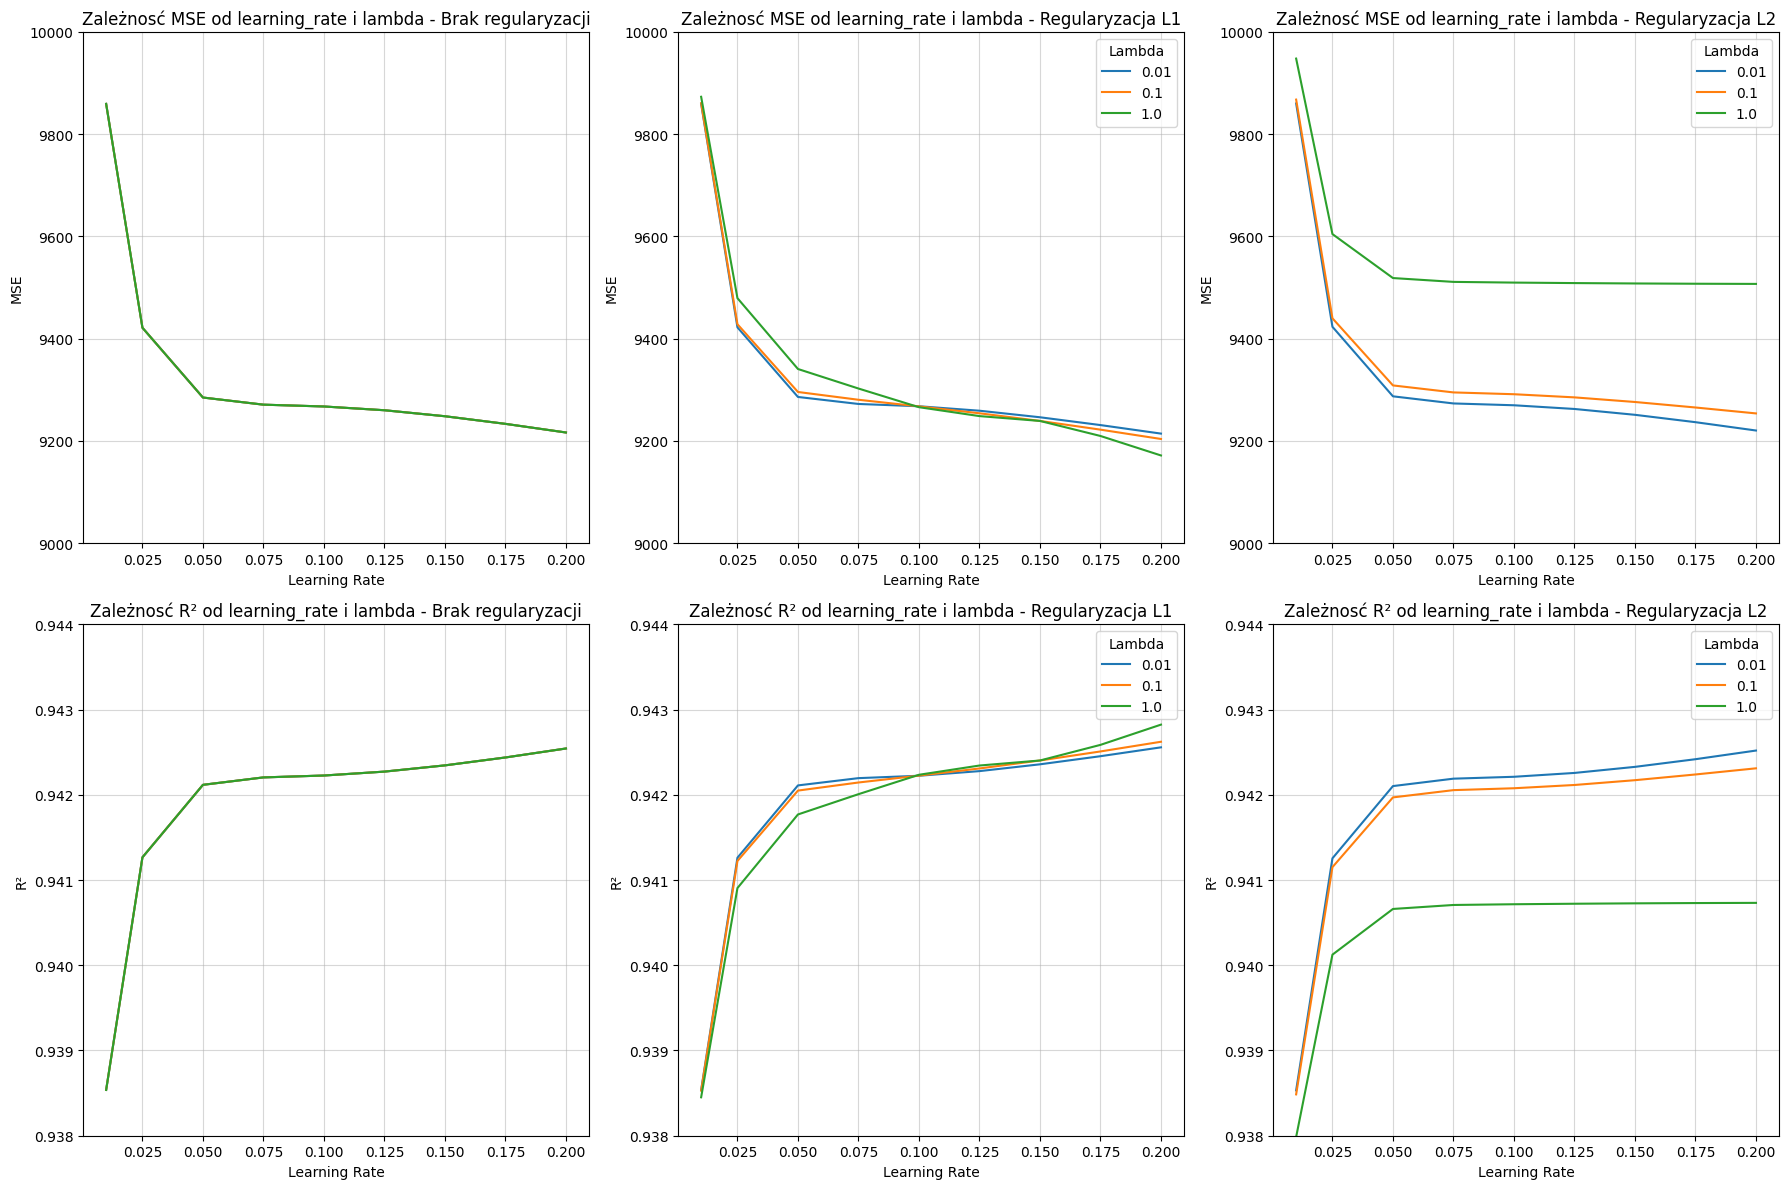

In [146]:
import matplotlib.pyplot as plt

def analyse(X_train, y_train, X_validation, y_validation, learning_rates, lambda_vals):
    results = []

    for lr in learning_rates:
        for lv in lambda_vals:
            for reg in [None, 'l1', 'l2']:
                my_model = LinearRegression(learning_rate=lr, regularization_type=reg, lambda_val=lv, iterations=1000)
                my_model.fit(X_train, y_train)
                predicted_value = my_model.predict(X_validation)
                mse = my_model.MSE(y_validation, predicted_value)
                r_2 = my_model.r_squared(y_validation, predicted_value)
                results.append({
                    'learning_rate': lr,
                    'lambda_val': lv,
                    'regularization_type': reg,
                    'mse': mse,
                    'r_2': r_2
                })
    return results

# wartości parametrów dla analizy
learning_rates = [0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2]
lambda_vals = [0.01, 0.1, 1.0]

# zebranie wyników
results = analyse(X_training_scaled, Y_training, X_validation_scaled, Y_validation, learning_rates, lambda_vals)
results_none = [res for res in results if res['regularization_type'] is None]
results_l1 = [res for res in results if res['regularization_type'] == 'l1']
results_l2 = [res for res in results if res['regularization_type'] == 'l2']

# wykresy
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

def plot_results(results_samlpe, title, ax_num):
    lambda_vals = sorted(set(r['lambda_val'] for r in results_samlpe))
    for lv in lambda_vals:
        learning_rates = [r['learning_rate'] for r in results_samlpe if r['lambda_val'] == lv]

        mse_values = [r['mse'] for r in results_samlpe if r['lambda_val'] == lv]
        ax[0, ax_num].plot(learning_rates, mse_values, label=f'{lv}')

        r2_values = [r['r_2'] for r in results_samlpe if r['lambda_val'] == lv]
        ax[1, ax_num].plot(learning_rates, r2_values, label=f'{lv}')

    ax[0, ax_num].set_title(f'Zależnosć MSE od learning_rate i lambda - {title}')
    ax[0, ax_num,].set_xlabel('Learning Rate')
    ax[0, ax_num].set_ylabel('MSE')
    if ax_num != 0: ax[0, ax_num].legend(title='Lambda')
    ax[0, ax_num].grid(alpha=0.5)
    ax[0, ax_num].set_ylim(9000, 10000)

    ax[1, ax_num].set_title(f'Zależnosć R² od learning_rate i lambda - {title}')
    ax[1, ax_num].set_xlabel('Learning Rate')
    ax[1, ax_num].set_ylabel('R²')
    if ax_num != 0: ax[1, ax_num].legend(title='Lambda')
    ax[1, ax_num].grid(alpha=0.5)
    ax[1, ax_num].set_ylim(0.938, 0.944)

plot_results(results_none, 'Brak regularyzacji', 0)
plot_results(results_l1, 'Regularyzacja L1', 1)
plot_results(results_l2, 'Regularyzacja L2', 2)

plt.tight_layout()
plt.show()

Wykresy pokazują, że we wszystkich przypadkach, zwiększenie wartości learning_rate polepsza działanie programu, bo zmniejsza wartość MSE, czyli zmniejsza błąd. Jednocześnie zwiększa to R².

Widać również, że zwiększenie lambda_val negatywnie wpływa na model z regularyzacją L2. Odwrotnie dzieje się dla modelu z regularyzacją L1. Tam najlepsze wyniki osiąga model z największą lambdą.

### **Najlepszy model**

Szukam sytuacji, w której MSE jest najmniejsze, a R² największe oraz wypisuję wagi modeli:

In [147]:
# najlepsze wyniki dla modeli
best_none_mse = min(results_none, key=lambda x: x['mse'])
best_none_r_squared = max(results_none, key=lambda x: x['r_2'])

best_l1_mse = min(results_l1, key=lambda x: x['mse'])
best_l1_r_squared = max(results_l1, key=lambda x: x['r_2'])

best_l2_mse = min(results_l2, key=lambda x: x['mse'])
best_l2_r_squared = max(results_l2, key=lambda x: x['r_2'])

print(f'Najlepszy wynik bez regularyzacji: learning_rate={best_none_mse["learning_rate"]}, \
lambda_val={best_none_mse["lambda_val"]} z MSE={best_none_mse["mse"]} i R²={best_none_r_squared["r_2"]}')

print(f'Najlepszy wynik z regularyzacją L1: learning_rate={best_l1_mse["learning_rate"]}, \
lambda_val={best_l1_mse["lambda_val"]} z MSE={best_l1_mse["mse"]} i R²={best_l1_r_squared["r_2"]}')

print(f'Najlepszy wynik z regularyzacją L2: learning_rate={best_l2_mse["learning_rate"]}, \
lambda_val={best_l2_mse["lambda_val"]} z MSE={best_l2_mse["mse"]} i R²={best_l2_r_squared["r_2"]}')

# wagi modeli
model_none = LinearRegression(learning_rate=best_none_mse['learning_rate'], regularization_type=None, lambda_val=best_none_mse['lambda_val'], iterations=1000)
model_none.fit(X_training_scaled, Y_training)

model_l1 = LinearRegression(learning_rate=best_l1_mse['learning_rate'], regularization_type='l1', lambda_val=best_l1_mse['lambda_val'], iterations=1000)
model_l1.fit(X_training_scaled, Y_training)

model_l2 = LinearRegression(learning_rate=best_l2_mse['learning_rate'], regularization_type='l2', lambda_val=best_l2_mse['lambda_val'], iterations=1000)
model_l2.fit(X_training_scaled, Y_training)

weights = pd.DataFrame({
    'None': model_none.weights.tolist() + [model_none.bias],
    'L1': np.round(model_l1.weights, 2).tolist() + [model_l1.bias],
    'L2': model_l2.weights.tolist() + [model_l2.bias]
}, index=X.columns.tolist() + ['Bias']).T
 
weights

Najlepszy wynik bez regularyzacji: learning_rate=0.2, lambda_val=0.01 z MSE=9216.515465966155 i R²=0.9425433230371387
Najlepszy wynik z regularyzacją L1: learning_rate=0.2, lambda_val=1.0 z MSE=9171.613471130258 i R²=0.9428232465528971
Najlepszy wynik z regularyzacją L2: learning_rate=0.2, lambda_val=0.01 z MSE=9220.412840588398 i R²=0.9425190264148957


,Length1,Length2,Length3,Height,Width,Length4,Length5,Length6,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish,Bias
None,7.410029,9.813435,-4.713316,-10.466468,29.610818,16.306858,175.768952,187.511303,13.730597,0.602124,-93.098457,-6.511434,74.242487,4.452188,455.137189
L1,6.930000,9.510000,-4.580000,0.030000,31.490000,24.800000,178.710000,166.940000,12.500000,2.320000,-85.570000,-4.800000,74.120000,5.100000,455.137189
L2,7.418144,9.814464,-4.738063,-9.980170,29.685756,18.417096,174.589655,186.051523,13.693428,0.662543,-92.801283,-6.450273,74.265196,4.493723,455.137189


Najlepszy z badanych przypadków występuje dla regularyzacji L1 i learning_rate = 0,2 oraz lambda_val = 1. Regularyzacja L1 zmniejsza wagi cech uznanych za nieistotne do wartości zbliżónych do zera. Z tabeli wag widać, że regularyzacja L1 uznała Height za nieistotną cechę. Pozostałe modele nie zachowują się tak dla tej cechy, co zgada się z teoretycznymi założeniami.

### **Ewaluacja modeli na zbiorze testowym**

Dla rzetelnej analizy należy porównać wyniki najlepszych modeli na zbiorze testowym z wynikami na zbiorze walidacyjnym. Jeśli wyniki byłyby znacząco gorsze, to może to oznaczać, że wystąpił overfitting (przeuczenie modelu):

In [148]:
testing_predicted_none = model_none.predict(X_testing_scaled)
testing_predicted_l1 = model_l1.predict(X_testing_scaled)
testing_predicted_l2 = model_l2.predict(X_testing_scaled)

print(f'MSE bez regularyzacji: {model_none.MSE(Y_testing, testing_predicted_none)}')
print(f'R^2 bez regularyzacji: {model_none.r_squared(Y_testing, testing_predicted_none)}')
print()

print(f'MSE dla regularyzacji L1: {model_l1.MSE(Y_testing, testing_predicted_l1)}')
print(f'R^2 dla regularyzacji L1: {model_l1.r_squared(Y_testing, testing_predicted_l1)}')
print()

print(f'MSE dla regularyzacji L2: {model_l2.MSE(Y_testing, testing_predicted_l2)}')
print(f'R^2 dla regularyzacji L2: {model_l2.r_squared(Y_testing, testing_predicted_l2)}')

MSE bez regularyzacji: 6634.1584817062485
R^2 bez regularyzacji: 0.9438983521101778

MSE dla regularyzacji L1: 6580.861850373778
R^2 dla regularyzacji L1: 0.94434905416274

MSE dla regularyzacji L2: 6632.944055091906
R^2 dla regularyzacji L2: 0.9439086218880998


Wyniki ze zbioru testowego są wystarczająco bliskie tym ze zbioru walidacyjnego, co oznacza, że modele działają dobrze.

### **Analiza i interpretacja otrzymanych waników**

Wyniki powyżej sugerują, że modele regresji wszystkich trzech typów satysfakcjonująco przewidują wagi ryb na podstawie zmiennych niezależnych. MSE na poziomie średnio około 6616 znaczy, że błąd wynosi średnio około 81 gramów. R² o wartościo koło 0,94 udowadnia dobre odzwierciedlenie zmienności danych.

Poniżej zaprezentuje różnice między wartościami rzeczywistymi a wartościami przewidzianymi przez model:

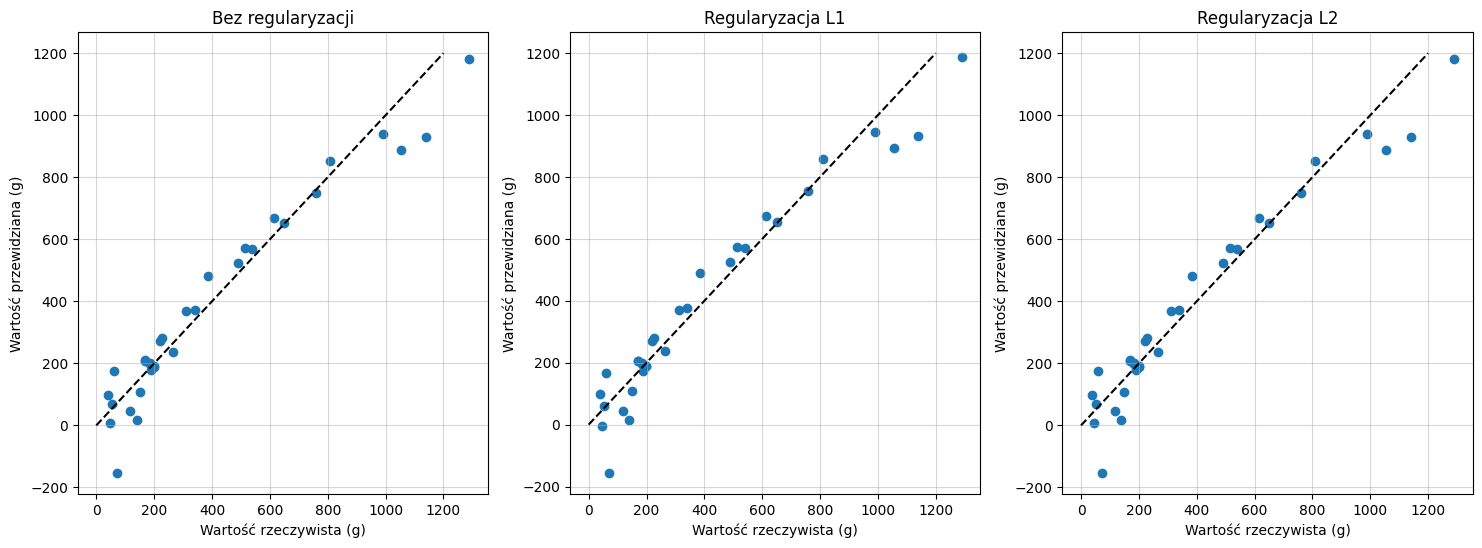

In [149]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].scatter(Y_testing, testing_predicted_none)
# x=y
ax[0].plot([0, 1200], [0, 1200], '--', color='black')
ax[0].set_xlabel('Wartość rzeczywista (g)')
ax[0].set_ylabel('Wartość przewidziana (g)')
ax[0].set_title('Bez regularyzacji')
ax[0].grid(alpha=0.5)

ax[1].scatter(Y_testing, testing_predicted_l1)
# x=y
ax[1].plot([0, 1200], [0, 1200], '--', color='black')
ax[1].set_xlabel('Wartość rzeczywista (g)')
ax[1].set_ylabel('Wartość przewidziana (g)')
ax[1].set_title('Regularyzacja L1')
ax[1].grid(alpha=0.5)

ax[2].scatter(Y_testing, testing_predicted_l2)
# x=y
ax[2].plot([0, 1200], [0, 1200], '--', color='black')
ax[2].set_xlabel('Wartość rzeczywista (g)')
ax[2].set_ylabel('Wartość przewidziana (g)')
ax[2].set_title('Regularyzacja L2')
ax[2].grid(alpha=0.5)

W idealnej sytuacji, punkty powinny znajdować się na przerwyanej linii y=x. Są one jednak wystarczająco blisko niej aby uznać, że modele działają skutecznie.